In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import transect_viz
from transect_viz import transect_cdec_data
import pandas as pd

In [15]:
df = transect_viz.load_transect_file('../data/Transect_20220302_Fabian.csv')
df['EC'] = df['Sonde1_SpCond']
df.head(3)

,DateTime,RECORD,RunName,Longitude,Latitude,GPS_SOG,Lag Estimate (ft),GPS_COG,PumpVolt,Sonde1_Temp,...,Sonde2_Temp,Sonde2_SpCond,Sonde2_Turbidity,Sonde2_DO_sat,Sonde2_DO_conc,Sonde2_Depth,Sonde2_pH,Sonde2_Chlor_ugL,Pump,EC
0,3/2/2022 10:52,41358,Run_01,-121.457512,37.802799,0.0,0.0,0.0,11.64388,13.431,...,13.042,842.51,2.09,95.20,10.00,1.353,7.71,3.50,On,840.80
1,3/2/2022 10:52,41359,Run_01,-121.457512,37.802799,0.0,0.0,0.0,11.64569,13.429,...,13.041,842.52,2.16,95.15,9.99,1.353,7.70,3.23,On,841.13
2,3/2/2022 10:52,41360,Run_01,-121.457520,37.802799,0.0,0.0,0.0,11.62740,13.427,...,13.040,842.52,2.18,95.12,9.99,1.357,7.70,3.17,On,841.11


In [16]:
import shapely

In [17]:
from shapely.geometry import Point, LineString

In [18]:
lonlats=df[['Longitude','Latitude']].values

In [19]:
transect_line = LineString(coordinates=lonlats)

In [22]:
dfs = transect_cdec_data.get_stations_cached(['ORM','ODM','OLD','GLE','GLC'])

In [23]:
dfs

,Station ID,Longitude,Latitude
0,GLC,-121.548500,37.819600
1,GLE,-121.434856,37.820258
2,ODM,-121.542145,37.810295
3,OLD,-121.449562,37.804810
4,ORM,-121.517380,37.793840


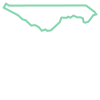

In [24]:
transect_line.simplify(tolerance=0.001)

In [25]:
p3 = Point(dfs.loc[3,['Longitude','Latitude']].values)

In [26]:
print(p3)

POINT (-121.449562 37.80481)


In [27]:
transect_line.project(p3)

0.009654323496645474

In [28]:
print(transect_line.interpolate(transect_line.project(p3)))

POINT (-121.449562 37.80462646)


In [29]:
from shapely.geometry import LinearRing

In [30]:
transect_ring = LinearRing(transect_line.coords)

In [31]:
from shapely.ops import nearest_points

In [32]:
for x in nearest_points(transect_ring, p3): print(x)

POINT (-121.449562 37.80462646)
POINT (-121.449562 37.80481)


In [33]:
import geopandas as gpd

In [34]:
gdf = gpd.GeoDataFrame(df)

In [35]:
gdf['geometry']=gpd.points_from_xy(df['Longitude'],df['Latitude'],crs="EPSG:4326")

c:\Users\psandhu\Miniconda3\envs\dev_transect_viz\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [36]:
gdf = gdf.to_crs('EPSG:32610')

In [37]:
utmxy = gdf.geometry

In [38]:
transect_line = LineString(utmxy)

In [39]:
transect_line.project(utmxy.iloc[-1])

31515.09594037082

In [40]:
cdec_stations=['GLE','GLC','ORM','ODM','OLD']

In [42]:
dfs = transect_cdec_data.get_stations_cached(cdec_stations)

In [43]:
dfs

,Station ID,Longitude,Latitude
0,GLC,-121.548500,37.819600
1,GLE,-121.434856,37.820258
2,ODM,-121.542145,37.810295
3,OLD,-121.449562,37.804810
4,ORM,-121.517380,37.793840


In [44]:
transect_line.project(Point(dfs.loc[0,['Longitude','Latitude']]))

26277.67019288347

In [45]:
gdfs = gpd.GeoDataFrame(dfs, geometry=gpd.points_from_xy(dfs['Longitude'],dfs['Latitude'],crs='EPSG:4326'))

c:\Users\psandhu\Miniconda3\envs\dev_transect_viz\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [46]:
gdfs

,Station ID,Longitude,Latitude,geometry
0,GLC,-121.548500,37.819600,POINT (-121.54850 37.81960)
1,GLE,-121.434856,37.820258,POINT (-121.43486 37.82026)
2,ODM,-121.542145,37.810295,POINT (-121.54215 37.81030)
3,OLD,-121.449562,37.804810,POINT (-121.44956 37.80481)
4,ORM,-121.517380,37.793840,POINT (-121.51738 37.79384)


In [47]:
transect_line.project(gdfs.geometry[0])

26277.67019288347

In [48]:
gdfs = gdfs.to_crs('EPSG:32610')

In [49]:
gdfs

,Station ID,Longitude,Latitude,geometry
0,GLC,-121.548500,37.819600,POINT (627752.794 4186791.943)
1,GLE,-121.434856,37.820258,POINT (637754.471 4187026.458)
2,ODM,-121.542145,37.810295,POINT (628328.265 4185768.192)
3,OLD,-121.449562,37.804810,POINT (636488.503 4185290.782)
4,ORM,-121.517380,37.793840,POINT (630537.300 4183976.686)


In [50]:
transect_line.project(gdfs.geometry[2])

20817.601494416962

In [51]:
gdfs['transect_dist']=[transect_line.project(row.geometry) for _,row in gdfs.iterrows()]
    

In [52]:
gdfs.sort_values(by='transect_dist')

,Station ID,Longitude,Latitude,geometry,transect_dist
3,OLD,-121.449562,37.804810,POINT (636488.503 4185290.782),919.705799
1,GLE,-121.434856,37.820258,POINT (637754.471 4187026.458),8108.819784
0,GLC,-121.548500,37.819600,POINT (627752.794 4186791.943),18147.702519
2,ODM,-121.542145,37.810295,POINT (628328.265 4185768.192),20817.601494
4,ORM,-121.517380,37.793840,POINT (630537.300 4183976.686),23757.157066


In [53]:
bsdate, bedate = transect_viz.get_buffered_start_end_dates(df)

In [54]:
import pandas as pd

In [61]:
df_cdec_15 = transect_cdec_data.get_cdec_data_cached(bsdate, bedate, cdec_stations,data_type='EC')

 Getting EC data from CDEC for  ['GLE', 'GLC', 'ORM', 'ODM', 'OLD']  from  2022-02-28 00:00:00  to  2022-03-05 00:00:00


In [62]:
df.DateTime

0       3/2/2022 10:52
1       3/2/2022 10:52
2       3/2/2022 10:52
3       3/2/2022 10:52
4       3/2/2022 10:52
             ...      
6008    3/2/2022 13:01
6009    3/2/2022 13:01
6010    3/2/2022 13:01
6011    3/2/2022 13:01
6012    3/2/2022 13:01
Name: DateTime, Length: 6013, dtype: object

In [63]:
df_cdec_15_1min = df_cdec_15.resample('T').interpolate()

In [64]:
df_cdec_15_1min.loc[df.DateTime.iloc[0]]

GLE    551.466667
GLC    516.600000
ORM    840.066667
ODM    515.933333
OLD    813.066667
Name: 2022-03-02 10:52:00, dtype: float64

In [65]:
df_cdec_15_1min.loc[df.DateTime.unique()]

,GLE,GLC,ORM,ODM,OLD
DATE TIME,,,,,
2022-03-02 10:52:00,551.466667,516.6,840.066667,515.933333,813.066667
2022-03-02 10:53:00,551.533333,517.4,840.933333,517.066667,812.933333
2022-03-02 10:54:00,551.600000,518.2,841.800000,518.200000,812.800000
2022-03-02 10:55:00,551.666667,519.0,842.666667,519.333333,812.666667
2022-03-02 10:56:00,551.733333,519.8,843.533333,520.466667,812.533333
...,...,...,...,...,...
2022-03-02 12:57:00,544.000000,577.8,911.600000,685.800000,792.000000
2022-03-02 12:58:00,544.333333,578.2,912.066667,689.533333,791.666667
2022-03-02 12:59:00,544.666667,578.6,912.533333,693.266667,791.333333


In [66]:
gdf['transect_dist'] = [transect_line.project(row.geometry) for _,row in gdf.iterrows()]

In [67]:
gdf

,DateTime,RECORD,RunName,Longitude,Latitude,GPS_SOG,Lag Estimate (ft),GPS_COG,PumpVolt,Sonde1_Temp,...,Sonde2_Turbidity,Sonde2_DO_sat,Sonde2_DO_conc,Sonde2_Depth,Sonde2_pH,Sonde2_Chlor_ugL,Pump,EC,geometry,transect_dist
0,3/2/2022 10:52,41358,Run_01,-121.457512,37.802799,0.0,0.0,0.0,11.64388,13.431,...,2.09,95.20,10.00,1.353,7.71,3.50,On,840.80,POINT (635792.295 4185056.087),0.000000
1,3/2/2022 10:52,41359,Run_01,-121.457512,37.802799,0.0,0.0,0.0,11.64569,13.429,...,2.16,95.15,9.99,1.353,7.70,3.23,On,841.13,POINT (635792.295 4185056.087),0.000000
2,3/2/2022 10:52,41360,Run_01,-121.457520,37.802799,0.0,0.0,0.0,11.62740,13.427,...,2.18,95.12,9.99,1.357,7.70,3.17,On,841.11,POINT (635791.626 4185056.076),0.669195
3,3/2/2022 10:52,41361,Run_01,-121.457520,37.802799,0.0,0.0,0.0,11.60062,13.426,...,0.00,0.00,0.00,0.000,0.00,0.00,On,841.07,POINT (635791.626 4185056.076),0.669195
4,3/2/2022 10:52,41362,Run_01,-121.457520,37.802799,0.0,0.0,0.0,11.64065,13.426,...,0.00,0.00,0.00,0.000,0.00,0.00,On,841.10,POINT (635791.626 4185056.076),0.669195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,3/2/2022 13:01,48287,Run_01,-121.457512,37.802792,0.0,0.0,26.0,11.97513,14.296,...,2.47,100.44,10.39,1.296,7.76,3.64,On,805.27,POINT (635792.309 4185055.242),31514.673131
6009,3/2/2022 13:01,48288,Run_01,-121.457512,37.802792,0.0,0.0,26.0,11.99872,14.294,...,2.50,100.53,10.40,1.297,7.76,3.56,On,804.35,POINT (635792.309 4185055.242),31514.673131
6010,3/2/2022 13:01,48289,Run_01,-121.457512,37.802792,0.0,0.0,26.0,11.98750,14.294,...,2.48,100.56,10.40,1.299,7.76,3.66,On,803.25,POINT (635792.309 4185055.242),31514.673131
6011,3/2/2022 13:01,48290,Run_01,-121.457512,37.802795,0.0,0.0,26.0,11.95543,14.295,...,2.46,100.53,10.40,1.300,7.76,3.75,On,802.21,POINT (635792.302 4185055.664),31515.095940


In [68]:
import numpy as np

In [69]:
gdf = gdf.astype({'DateTime':np.datetime64})

In [70]:
gdf.join(df_cdec_15_1min)

,DateTime,RECORD,RunName,Longitude,Latitude,GPS_SOG,Lag Estimate (ft),GPS_COG,PumpVolt,Sonde1_Temp,...,Sonde2_Chlor_ugL,Pump,EC,geometry,transect_dist,GLE,GLC,ORM,ODM,OLD
0,2022-03-02 10:52:00,41358,Run_01,-121.457512,37.802799,0.0,0.0,0.0,11.64388,13.431,...,3.50,On,840.80,POINT (635792.295 4185056.087),0.000000,NaN,NaN,NaN,NaN,NaN
1,2022-03-02 10:52:00,41359,Run_01,-121.457512,37.802799,0.0,0.0,0.0,11.64569,13.429,...,3.23,On,841.13,POINT (635792.295 4185056.087),0.000000,NaN,NaN,NaN,NaN,NaN
2,2022-03-02 10:52:00,41360,Run_01,-121.457520,37.802799,0.0,0.0,0.0,11.62740,13.427,...,3.17,On,841.11,POINT (635791.626 4185056.076),0.669195,NaN,NaN,NaN,NaN,NaN
3,2022-03-02 10:52:00,41361,Run_01,-121.457520,37.802799,0.0,0.0,0.0,11.60062,13.426,...,0.00,On,841.07,POINT (635791.626 4185056.076),0.669195,NaN,NaN,NaN,NaN,NaN
4,2022-03-02 10:52:00,41362,Run_01,-121.457520,37.802799,0.0,0.0,0.0,11.64065,13.426,...,0.00,On,841.10,POINT (635791.626 4185056.076),0.669195,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,2022-03-02 13:01:00,48287,Run_01,-121.457512,37.802792,0.0,0.0,26.0,11.97513,14.296,...,3.64,On,805.27,POINT (635792.309 4185055.242),31514.673131,NaN,NaN,NaN,NaN,NaN
6009,2022-03-02 13:01:00,48288,Run_01,-121.457512,37.802792,0.0,0.0,26.0,11.99872,14.294,...,3.56,On,804.35,POINT (635792.309 4185055.242),31514.673131,NaN,NaN,NaN,NaN,NaN
6010,2022-03-02 13:01:00,48289,Run_01,-121.457512,37.802792,0.0,0.0,26.0,11.98750,14.294,...,3.66,On,803.25,POINT (635792.309 4185055.242),31514.673131,NaN,NaN,NaN,NaN,NaN
6011,2022-03-02 13:01:00,48290,Run_01,-121.457512,37.802795,0.0,0.0,26.0,11.95543,14.295,...,3.75,On,802.21,POINT (635792.302 4185055.664),31515.095940,NaN,NaN,NaN,NaN,NaN


In [71]:
df_cdec_15_1min

,GLE,GLC,ORM,ODM,OLD
DATE TIME,,,,,
2022-02-28 00:00:00,498.000000,575.000000,834.000000,754.0,787.000000
2022-02-28 00:01:00,498.066667,574.866667,833.266667,755.4,786.466667
2022-02-28 00:02:00,498.133333,574.733333,832.533333,756.8,785.933333
2022-02-28 00:03:00,498.200000,574.600000,831.800000,758.2,785.400000
2022-02-28 00:04:00,498.266667,574.466667,831.066667,759.6,784.866667
...,...,...,...,...,...
2022-03-04 23:56:00,560.533333,479.600000,642.666667,483.6,870.533333
2022-03-04 23:57:00,560.400000,480.200000,644.000000,484.2,870.400000
2022-03-04 23:58:00,560.266667,480.800000,645.333333,484.8,870.266667


In [72]:
gdf.set_index('DateTime').join(df_cdec_15_1min)

,RECORD,RunName,Longitude,Latitude,GPS_SOG,Lag Estimate (ft),GPS_COG,PumpVolt,Sonde1_Temp,Sonde1_SpCond,...,Sonde2_Chlor_ugL,Pump,EC,geometry,transect_dist,GLE,GLC,ORM,ODM,OLD
2022-03-02 10:52:00,41358,Run_01,-121.457512,37.802799,0.0,0.0,0.0,11.64388,13.431,840.80,...,3.50,On,840.80,POINT (635792.295 4185056.087),0.000000,551.466667,516.6,840.066667,515.933333,813.066667
2022-03-02 10:52:00,41359,Run_01,-121.457512,37.802799,0.0,0.0,0.0,11.64569,13.429,841.13,...,3.23,On,841.13,POINT (635792.295 4185056.087),0.000000,551.466667,516.6,840.066667,515.933333,813.066667
2022-03-02 10:52:00,41360,Run_01,-121.457520,37.802799,0.0,0.0,0.0,11.62740,13.427,841.11,...,3.17,On,841.11,POINT (635791.626 4185056.076),0.669195,551.466667,516.6,840.066667,515.933333,813.066667
2022-03-02 10:52:00,41361,Run_01,-121.457520,37.802799,0.0,0.0,0.0,11.60062,13.426,841.07,...,0.00,On,841.07,POINT (635791.626 4185056.076),0.669195,551.466667,516.6,840.066667,515.933333,813.066667
2022-03-02 10:52:00,41362,Run_01,-121.457520,37.802799,0.0,0.0,0.0,11.64065,13.426,841.10,...,0.00,On,841.10,POINT (635791.626 4185056.076),0.669195,551.466667,516.6,840.066667,515.933333,813.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-02 13:01:00,48287,Run_01,-121.457512,37.802792,0.0,0.0,26.0,11.97513,14.296,805.27,...,3.64,On,805.27,POINT (635792.309 4185055.242),31514.673131,545.066667,579.0,913.600000,697.466667,790.666667
2022-03-02 13:01:00,48288,Run_01,-121.457512,37.802792,0.0,0.0,26.0,11.99872,14.294,804.35,...,3.56,On,804.35,POINT (635792.309 4185055.242),31514.673131,545.066667,579.0,913.600000,697.466667,790.666667
2022-03-02 13:01:00,48289,Run_01,-121.457512,37.802792,0.0,0.0,26.0,11.98750,14.294,803.25,...,3.66,On,803.25,POINT (635792.309 4185055.242),31514.673131,545.066667,579.0,913.600000,697.466667,790.666667
2022-03-02 13:01:00,48290,Run_01,-121.457512,37.802795,0.0,0.0,26.0,11.95543,14.295,802.21,...,3.75,On,802.21,POINT (635792.302 4185055.664),31515.095940,545.066667,579.0,913.600000,697.466667,790.666667


In [73]:
transect_max, transect_min = gdf.transect_dist.agg(['max','min'])

In [74]:
df_cdec_15

,GLE,GLC,ORM,ODM,OLD
DATE TIME,,,,,
2022-02-28 00:00:00,498.0,575.0,834.0,754.0,787.0
2022-02-28 00:15:00,499.0,573.0,823.0,775.0,779.0
2022-02-28 00:30:00,501.0,569.0,843.0,795.0,775.0
2022-02-28 00:45:00,506.0,567.0,850.0,805.0,768.0
2022-02-28 01:00:00,508.0,565.0,863.0,811.0,762.0
...,...,...,...,...,...
2022-03-04 23:00:00,570.0,452.0,585.0,461.0,876.0
2022-03-04 23:15:00,568.0,459.0,595.0,465.0,875.0
2022-03-04 23:30:00,564.0,466.0,608.0,470.0,874.0


In [75]:
gdfs = gdfs.sort_values(by='transect_dist').reset_index(drop=True)
gdfs

,Station ID,Longitude,Latitude,geometry,transect_dist
0,OLD,-121.449562,37.804810,POINT (636488.503 4185290.782),919.705799
1,GLE,-121.434856,37.820258,POINT (637754.471 4187026.458),8108.819784
2,GLC,-121.548500,37.819600,POINT (627752.794 4186791.943),18147.702519
3,ODM,-121.542145,37.810295,POINT (628328.265 4185768.192),20817.601494
4,ORM,-121.517380,37.793840,POINT (630537.300 4183976.686),23757.157066


In [76]:
pd.concat([pd.DataFrame(data=[['BEG',37.803,-121.475,np.nan,0]], columns=gdfs.columns),gdfs])

,Station ID,Longitude,Latitude,geometry,transect_dist
0,BEG,37.803000,-121.475000,None,0.000000
0,OLD,-121.449562,37.804810,POINT (636488.503 4185290.782),919.705799
1,GLE,-121.434856,37.820258,POINT (637754.471 4187026.458),8108.819784
2,GLC,-121.548500,37.819600,POINT (627752.794 4186791.943),18147.702519
3,ODM,-121.542145,37.810295,POINT (628328.265 4185768.192),20817.601494
4,ORM,-121.517380,37.793840,POINT (630537.300 4183976.686),23757.157066


In [77]:
pgdf = gdf[['Latitude','Longitude','Sonde1_SpCond','transect_dist']]

In [78]:
df_end_points = pd.DataFrame(pgdf.iloc[[0,-1]])
df_end_points['Station ID']=['BEG','END']
df_end_points

,Latitude,Longitude,Sonde1_SpCond,transect_dist,Station ID
0,37.802799,-121.457512,840.80,0.00000,BEG
6012,37.802795,-121.457512,801.92,31515.09594,END


In [79]:
df_ec_linear_refs=pd.concat([df_end_points,gdfs]).sort_values('transect_dist').reset_index(drop=True)
df_ec_linear_refs

,Latitude,Longitude,Sonde1_SpCond,transect_dist,Station ID,geometry
0,37.802799,-121.457512,840.80,0.000000,BEG,None
1,37.804810,-121.449562,NaN,919.705799,OLD,POINT (636488.503 4185290.782)
2,37.820258,-121.434856,NaN,8108.819784,GLE,POINT (637754.471 4187026.458)
3,37.819600,-121.548500,NaN,18147.702519,GLC,POINT (627752.794 4186791.943)
4,37.810295,-121.542145,NaN,20817.601494,ODM,POINT (628328.265 4185768.192)
5,37.793840,-121.517380,NaN,23757.157066,ORM,POINT (630537.300 4183976.686)
6,37.802795,-121.457512,801.92,31515.095940,END,None


In [80]:
df_ec_linear_refs.iloc[1:6]

,Latitude,Longitude,Sonde1_SpCond,transect_dist,Station ID,geometry
1,37.804810,-121.449562,NaN,919.705799,OLD,POINT (636488.503 4185290.782)
2,37.820258,-121.434856,NaN,8108.819784,GLE,POINT (637754.471 4187026.458)
3,37.819600,-121.548500,NaN,18147.702519,GLC,POINT (627752.794 4186791.943)
4,37.810295,-121.542145,NaN,20817.601494,ODM,POINT (628328.265 4185768.192)
5,37.793840,-121.517380,NaN,23757.157066,ORM,POINT (630537.300 4183976.686)


In [81]:
df_ec_vals = df_cdec_15.iloc[0:1].T
df_ec_vals.columns=['Obs EC']
df_ec_vals

,Obs EC
GLE,498.0
GLC,575.0
ORM,834.0
ODM,754.0
OLD,787.0


In [82]:
df_ec_at_stations=df_ec_vals.join(df_ec_linear_refs.set_index('Station ID')).sort_values(by='transect_dist')

In [83]:
df_ec_at_stations

,Obs EC,Latitude,Longitude,Sonde1_SpCond,transect_dist,geometry
OLD,787.0,37.804810,-121.449562,NaN,919.705799,POINT (636488.503 4185290.782)
GLE,498.0,37.820258,-121.434856,NaN,8108.819784,POINT (637754.471 4187026.458)
GLC,575.0,37.819600,-121.548500,NaN,18147.702519,POINT (627752.794 4186791.943)
ODM,754.0,37.810295,-121.542145,NaN,20817.601494,POINT (628328.265 4185768.192)
ORM,834.0,37.793840,-121.517380,NaN,23757.157066,POINT (630537.300 4183976.686)


In [84]:
df_ec_at_stations.loc['OLD']['transect_dist'], transect_max

(919.7057990810158, 31515.09594037082)

In [85]:
factor = df_ec_at_stations.loc['OLD']['transect_dist']/(transect_max-df_ec_at_stations.loc['ORM']['transect_dist'])

In [86]:
ec_beg_end = df_ec_at_stations.loc['OLD']['Obs EC'] + factor * (df_ec_at_stations.loc['OLD']['Obs EC']-df_ec_at_stations.loc['ORM']['Obs EC'])

In [87]:
ec_beg_end

781.4281370020655

In [88]:
df_ec_linear_refs

,Latitude,Longitude,Sonde1_SpCond,transect_dist,Station ID,geometry
0,37.802799,-121.457512,840.80,0.000000,BEG,None
1,37.804810,-121.449562,NaN,919.705799,OLD,POINT (636488.503 4185290.782)
2,37.820258,-121.434856,NaN,8108.819784,GLE,POINT (637754.471 4187026.458)
3,37.819600,-121.548500,NaN,18147.702519,GLC,POINT (627752.794 4186791.943)
4,37.810295,-121.542145,NaN,20817.601494,ODM,POINT (628328.265 4185768.192)
5,37.793840,-121.517380,NaN,23757.157066,ORM,POINT (630537.300 4183976.686)
6,37.802795,-121.457512,801.92,31515.095940,END,None


In [89]:
df_ec_linear_refs.loc[df_ec_linear_refs['Station ID']=='BEG','Sonde1_SpCond'] = ec_beg_end

In [90]:
df_ec_linear_refs.loc[df_ec_linear_refs['Station ID']=='END','Sonde1_SpCond'] = ec_beg_end

In [91]:
df_ec_linear_refs = df_ec_linear_refs.set_index('Station ID').join(df_ec_vals).reset_index()
df_ec_linear_refs

,Station ID,Latitude,Longitude,Sonde1_SpCond,transect_dist,geometry,Obs EC
0,BEG,37.802799,-121.457512,781.428137,0.000000,None,NaN
1,OLD,37.804810,-121.449562,NaN,919.705799,POINT (636488.503 4185290.782),787.0
2,GLE,37.820258,-121.434856,NaN,8108.819784,POINT (637754.471 4187026.458),498.0
3,GLC,37.819600,-121.548500,NaN,18147.702519,POINT (627752.794 4186791.943),575.0
4,ODM,37.810295,-121.542145,NaN,20817.601494,POINT (628328.265 4185768.192),754.0
5,ORM,37.793840,-121.517380,NaN,23757.157066,POINT (630537.300 4183976.686),834.0
6,END,37.802795,-121.457512,781.428137,31515.095940,None,NaN


In [92]:
df_ec_linear_refs['Sonde1_SpCond']=df_ec_linear_refs['Sonde1_SpCond'].fillna(df_ec_linear_refs['Obs EC'])

In [93]:
df_ec_linear_refs

,Station ID,Latitude,Longitude,Sonde1_SpCond,transect_dist,geometry,Obs EC
0,BEG,37.802799,-121.457512,781.428137,0.000000,None,NaN
1,OLD,37.804810,-121.449562,787.000000,919.705799,POINT (636488.503 4185290.782),787.0
2,GLE,37.820258,-121.434856,498.000000,8108.819784,POINT (637754.471 4187026.458),498.0
3,GLC,37.819600,-121.548500,575.000000,18147.702519,POINT (627752.794 4186791.943),575.0
4,ODM,37.810295,-121.542145,754.000000,20817.601494,POINT (628328.265 4185768.192),754.0
5,ORM,37.793840,-121.517380,834.000000,23757.157066,POINT (630537.300 4183976.686),834.0
6,END,37.802795,-121.457512,781.428137,31515.095940,None,NaN


In [94]:
columns = ['Longitude','Latitude','Sonde1_SpCond','transect_dist']

In [95]:
dfcalc = df_ec_linear_refs[columns].copy()

In [96]:
dfcalc.loc[:,'Sonde1_SpCond']=np.nan

In [97]:
dfcalc

,Longitude,Latitude,Sonde1_SpCond,transect_dist
0,-121.457512,37.802799,NaN,0.000000
1,-121.449562,37.804810,NaN,919.705799
2,-121.434856,37.820258,NaN,8108.819784
3,-121.548500,37.819600,NaN,18147.702519
4,-121.542145,37.810295,NaN,20817.601494
5,-121.517380,37.793840,NaN,23757.157066
6,-121.457512,37.802795,NaN,31515.095940


In [98]:
dfmerged=pd.concat([dfcalc,gdf[columns]]).sort_values(by='transect_dist').reset_index(drop=True)

In [99]:
dfmerged

,Longitude,Latitude,Sonde1_SpCond,transect_dist
0,-121.457512,37.802799,NaN,0.000000
1,-121.457512,37.802799,840.80,0.000000
2,-121.457512,37.802799,841.13,0.000000
3,-121.457520,37.802799,839.39,0.669195
4,-121.457520,37.802799,841.13,0.669195
...,...,...,...,...
6015,-121.457512,37.802792,803.25,31514.673131
6016,-121.457512,37.802792,804.35,31514.673131
6017,-121.457512,37.802795,802.21,31515.095940
6018,-121.457512,37.802795,NaN,31515.095940


In [100]:
dfresult = dfmerged.interpolate().dropna()

In [101]:
import hvplot.pandas

In [102]:
dfresult['DateTime']='2022-02-28 00:00'

In [105]:
dfresult

,Longitude,Latitude,Sonde1_SpCond,transect_dist,DateTime
1,-121.457512,37.802799,840.800,0.000000,2022-02-28 00:00
2,-121.457512,37.802799,841.130,0.000000,2022-02-28 00:00
3,-121.457520,37.802799,839.390,0.669195,2022-02-28 00:00
4,-121.457520,37.802799,841.130,0.669195,2022-02-28 00:00
5,-121.457520,37.802799,841.120,0.669195,2022-02-28 00:00
...,...,...,...,...,...
6015,-121.457512,37.802792,803.250,31514.673131,2022-02-28 00:00
6016,-121.457512,37.802792,804.350,31514.673131,2022-02-28 00:00
6017,-121.457512,37.802795,802.210,31515.095940,2022-02-28 00:00
6018,-121.457512,37.802795,802.065,31515.095940,2022-02-28 00:00


In [106]:
map, legend = transect_viz.map_transect_with_size_and_color(dfresult, data_column='Sonde1_SpCond')

In [107]:
carto_light_tiles=transect_viz.get_tile_layer()

In [108]:
carto_light_tiles*map.opts(frame_width=800, colorbar=True)+legend

c:\Users\psandhu\Miniconda3\envs\dev_transect_viz\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\Users\psandhu\Miniconda3\envs\dev_transect_viz\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
c:\Users\psandhu\Miniconda3\envs\dev_transect_viz\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
c:\Users\psandhu\Minic

:Layout
   .Overlay.I  :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [Longitude,Latitude]   (Sonde1_SpCond,DateTime)
   .Overlay.II :Overlay
      .Labels.I :Labels   [x,y]   (labels)
      .Points.I :Points   [x,y]   (size)